In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

torch.manual_seed(42)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)


cuda


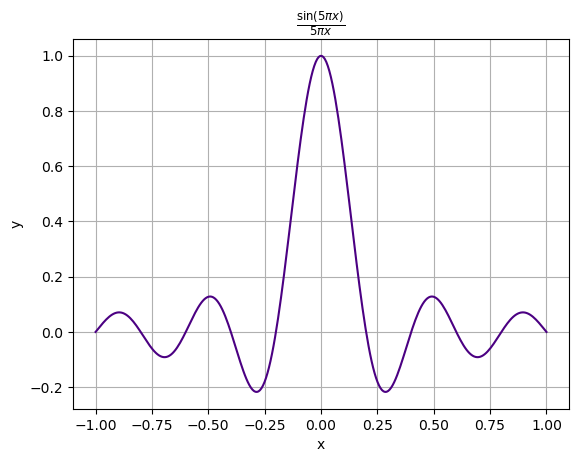

In [16]:
def function_1(x):
    return (np.sin(5 * (np.pi) * x)) / (5 * np.pi * x)

x = np.linspace(-1, 1, 300).reshape(-1, 1)
y = function_1(x)

# Convert x and y into torch tensors
func1_x, func1_y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Plot the function
plt.plot(func1_x, func1_y, color = "indigo")
plt.title(r'$\frac{\sin(5 \pi x)}{5 \pi x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [17]:
"""
    For this task, I have defined a deep learning model with 7 hidden layers using nn.Sequential.
    The model maps a single input feature to a single output, passing through several
    fully connected (linear) layers with ReLU activation functions. Each ReLU activation
    introduces non-linearity, allowing the model to learn complex patterns in the data.
    The architecture follows the pattern:
    
    Input (1) -> 6 -> 12 -> 12 -> 12 -> 12 -> 12 -> 6 -> Output (1)
    
    where each arrow represents a linear layer followed by a ReLU activation, 
    and the numbers indicate the number of units in each layer.
"""

class ModelDLL(nn.Module):
    def __init__(self):
        super(ModelDLL, self).__init__()
        
        # Define layers using nn.Sequential
        self.layers = nn.Sequential(
            nn.Linear(1, 6),   
            nn.ReLU(),         
            
            nn.Linear(6, 12),  
            nn.ReLU(),         
            
            nn.Linear(12, 12), 
            nn.ReLU(),         
            
            nn.Linear(12, 12), 
            nn.ReLU(),         
            
            nn.Linear(12, 12), 
            nn.ReLU(),         
            
            nn.Linear(12, 12), 
            nn.ReLU(),         
            
            nn.Linear(12, 6),  
            nn.ReLU(),         
            
            nn.Linear(6, 1)    
        )

    def forward(self, input_data):
        return self.layers(input_data)


In [18]:
#p norm function, as mentioned in the canvas. 

def p_norm(model, p=2):
    grad_all = 0.0
    for param in model.parameters():
        if param.grad is not None:
            grad = (param.grad.cpu().data.numpy() ** p).sum()
            grad_all += grad
    grad_norm = grad_all ** (1/p)
    return grad_norm


In [19]:
"""
    I have implemented this function to train the given model using Adam optimizer and Mean Squared Error (MSE) loss function.

    The training process involves:
    1. Forward Pass: Computing the predicted outputs for the given inputs.
    2. Loss Calculation: Calculating the loss between predicted outputs and targets using MSE.
    3. Backward Pass: Computing gradients of the loss with respect to model parameters.
    4. Weight Update: Adjusting model parameters based on the computed gradients.
    
    The function records both the loss and the gradient norm after each iteration and stops 
    early if the loss falls below a specified threshold (0.001), indicating convergence.
"""




def train_the_model(model, inputs, targets, total_iterations=20000):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)  
    criterion = nn.MSELoss()
    
    grad_data = []
    loss_data = []
    
    for iteration in range(total_iterations):
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Record loss and gradient norm after each iteration
        grad_norm = p_norm(model)
        grad_data.append(grad_norm)
        loss_data.append(loss.item())

        if iteration % 1000 == 0:
            print(f"Iteration {iteration}/{total_iterations}, Loss: {loss.item():.6f}, Grad Norm: {grad_norm:.6f}")
        if loss_data[-1] < 0.001:
            print("Convergence achieved, stopping it")
            break

    return loss_data, grad_data


In [20]:
model_one = ModelDLL().to(device)
total_iterations = 20000
# Train the model using func1_x and func1_y
model_one_losses, grad_data = train_the_model(model_one, func1_x.to(device), func1_y.to(device), total_iterations=total_iterations)

Iteration 0/20000, Loss: 0.167011, Grad Norm: 0.617117
Iteration 1000/20000, Loss: 0.107780, Grad Norm: 0.288979
Iteration 2000/20000, Loss: 0.092673, Grad Norm: 0.152511
Iteration 3000/20000, Loss: 0.086360, Grad Norm: 0.076086
Iteration 4000/20000, Loss: 0.068748, Grad Norm: 0.148917
Iteration 5000/20000, Loss: 0.049412, Grad Norm: 0.140142
Iteration 6000/20000, Loss: 0.036020, Grad Norm: 0.115621
Iteration 7000/20000, Loss: 0.025414, Grad Norm: 0.094939
Iteration 8000/20000, Loss: 0.016297, Grad Norm: 0.074774
Iteration 9000/20000, Loss: 0.010811, Grad Norm: 0.057575
Iteration 10000/20000, Loss: 0.007136, Grad Norm: 0.042906
Iteration 11000/20000, Loss: 0.004631, Grad Norm: 0.031120
Iteration 12000/20000, Loss: 0.003025, Grad Norm: 0.020992
Iteration 13000/20000, Loss: 0.002084, Grad Norm: 0.014408
Iteration 14000/20000, Loss: 0.001598, Grad Norm: 0.007990
Iteration 15000/20000, Loss: 0.001387, Grad Norm: 0.025822
Iteration 16000/20000, Loss: 0.001310, Grad Norm: 0.004366
Iteration 

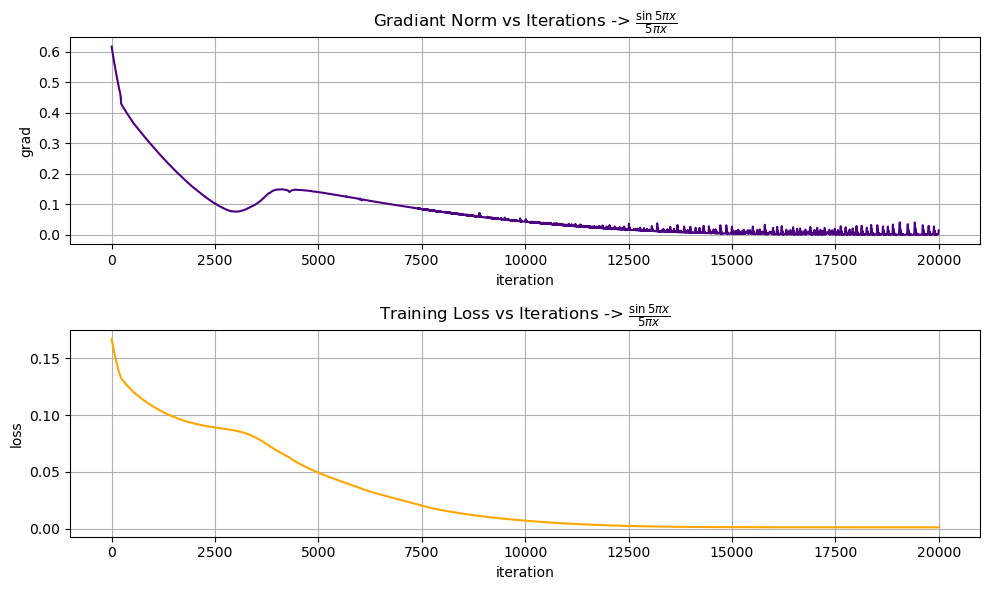

In [23]:
# Plot gradient and loss data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot for gradient norm
ax1.plot(range(len(grad_data)), grad_data, label='grad', color = "indigo", )
ax1.set_title("Gradiant Norm vs Iterations -> " + r'$\frac{\sin 5 \pi x}{5 \pi x}$')
ax1.set_xlabel('iteration')
ax1.set_ylabel('grad')
ax1.grid(True)

# Plot for loss
ax2.plot(range(len(model_one_losses)), model_one_losses, label='loss', color = "orange")
ax2.set_title("Training Loss vs Iterations -> " + r'$\frac{\sin 5 \pi x}{5 \pi x}$')
ax2.set_xlabel('iteration')
ax2.set_ylabel('loss')

plt.tight_layout()
plt.grid(True)
plt.show()
